<a href="https://colab.research.google.com/github/alheetiaabdullah/my-first-website/blob/main/AlHeeti_my_first_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome

In [1]:
# --- Step 1: Clone your GitHub repository ---
!git clone https://github.com/alheetiaabdullah/my-first-website.git

Cloning into 'my-first-website'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 30 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (30/30), 370.22 KiB | 2.92 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [3]:
# --- Step 2: Move into the data1 folder ---
%cd my-first-website/data1

/content/my-first-website/data1


In [4]:
!pwd #tells you were you are in the folder system

/content/my-first-website/data1


In [5]:
!ls #lists all the files in the current folder

AtHome-NightSky.jpg  hello.md  Summer-Day-Poem.jpg


In [11]:
# ----- Step 4: Import libaries -----
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Collect image files (jpg, jpeg, png, gif, etc.)
image_files = [f for f in os.listdir('.') if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]
print(f"Found {len(image_files)} image files.")

Found 2 image files.


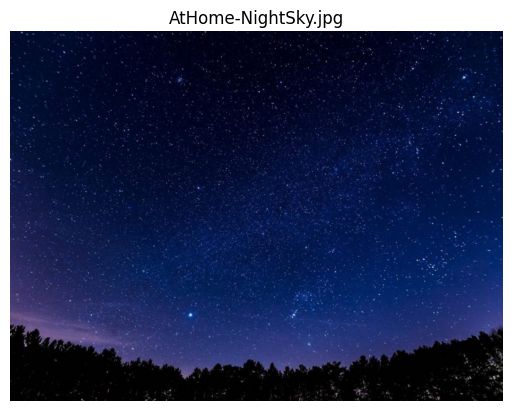

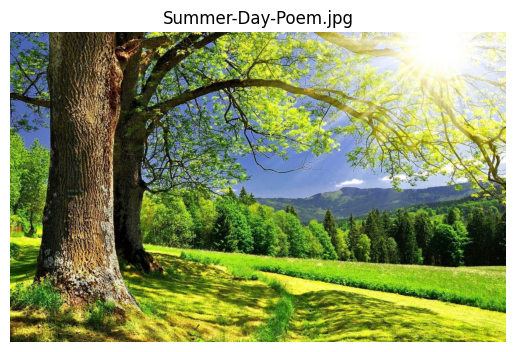

In [13]:
# Show first 5 images (or all if fewer than 5)
for fname in image_files[:5]:
    img = Image.open(fname)
    plt.imshow(img)
    plt.title(fname)
    plt.axis('off')
    plt.show()

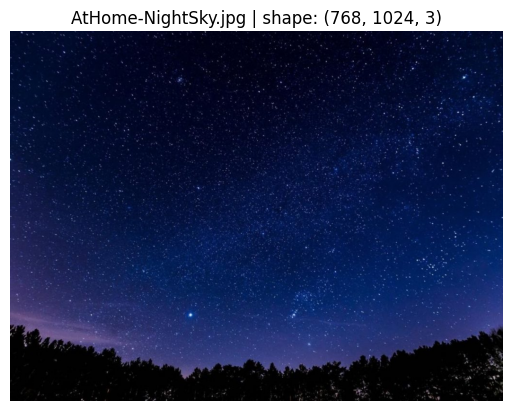

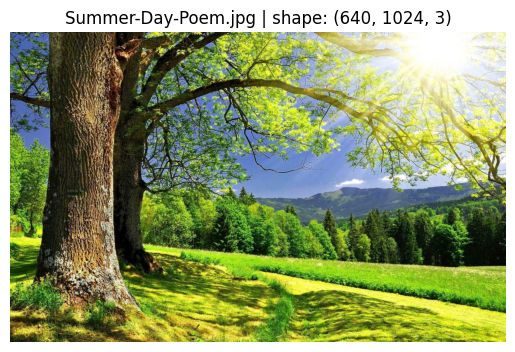

First array shape: (768, 1024, 3)
Data type: uint8


In [14]:
# --- Step 7: Convert images to NumPy arrays ---
images_as_arrays = []

for fname in image_files[:5]:  # limit to first 5 for preview
    img = Image.open(fname).convert("RGB")  # ensure 3 channels
    arr = np.array(img)  # convert to numpy array
    images_as_arrays.append(arr)

    # Show image and its shape
    plt.imshow(arr)
    plt.title(f"{fname} | shape: {arr.shape}")
    plt.axis("off")
    plt.show()

# Now images_as_arrays is a list of NumPy arrays
print("First array shape:", images_as_arrays[0].shape)
print("Data type:", images_as_arrays[0].dtype)

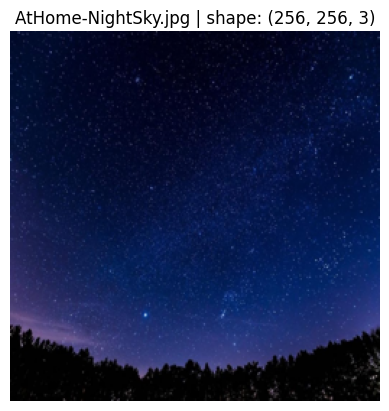

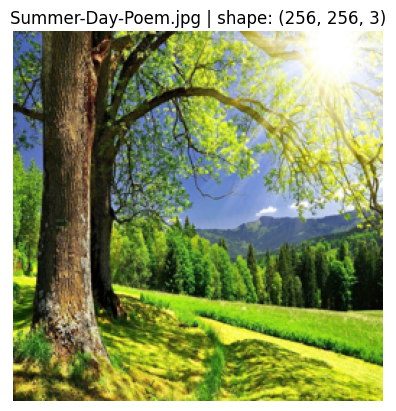

Final dataset shape: (2, 256, 256, 3)
Data type: uint8


In [15]:
images_as_arrays = []

for fname in image_files[:5]:  # limit to first 5 for preview
    img = Image.open(fname).convert("RGB")
    img = img.resize((256, 256))  # resize to 256x256
    arr = np.array(img)  # convert to numpy array
    images_as_arrays.append(arr)

    # Show resized image and its shape
    plt.imshow(arr)
    plt.title(f"{fname} | shape: {arr.shape}")
    plt.axis("off")
    plt.show()

# Convert list of arrays into one big NumPy array (dataset)
images_as_arrays = np.stack(images_as_arrays)

print("Final dataset shape:", images_as_arrays.shape)  # (num_images, 256, 256, 3)
print("Data type:", images_as_arrays.dtype)

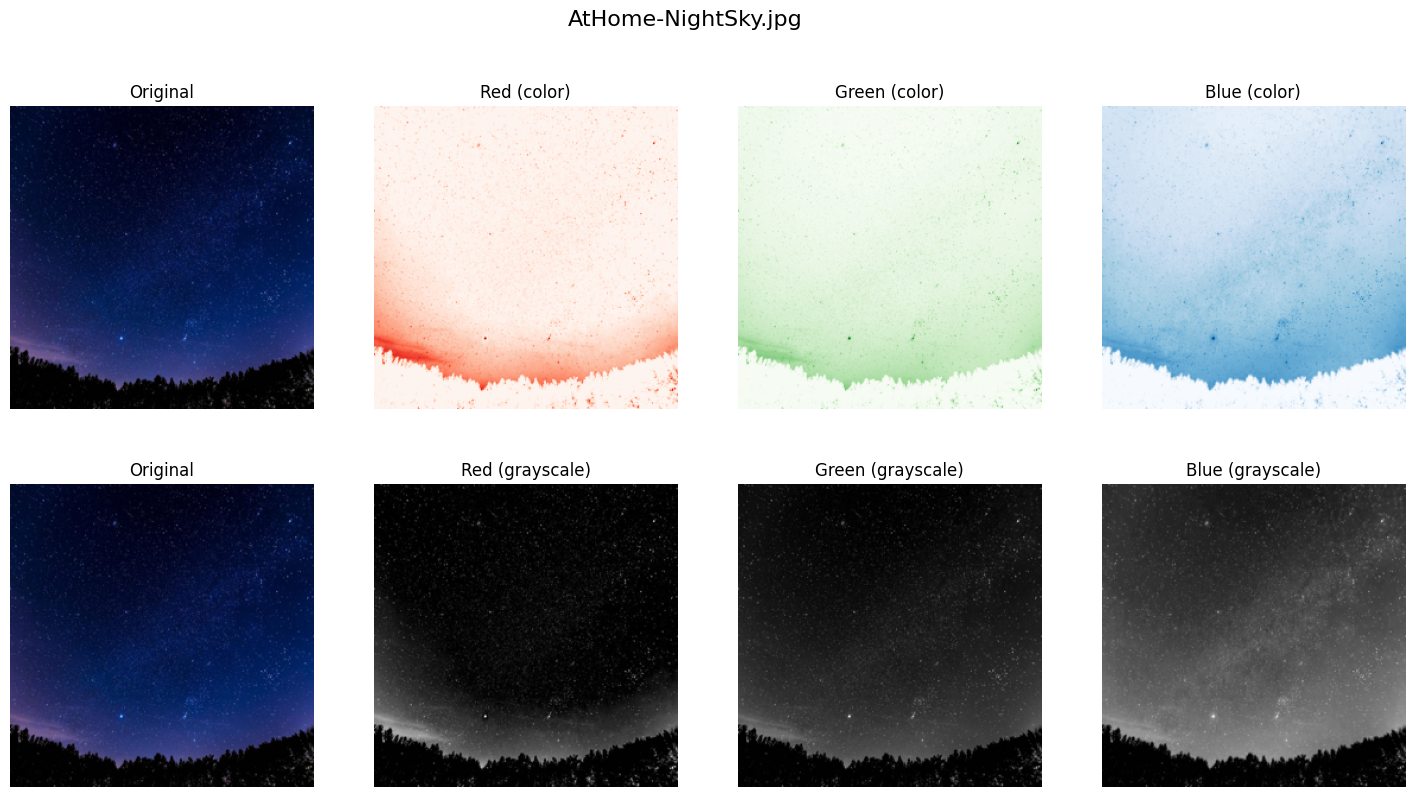

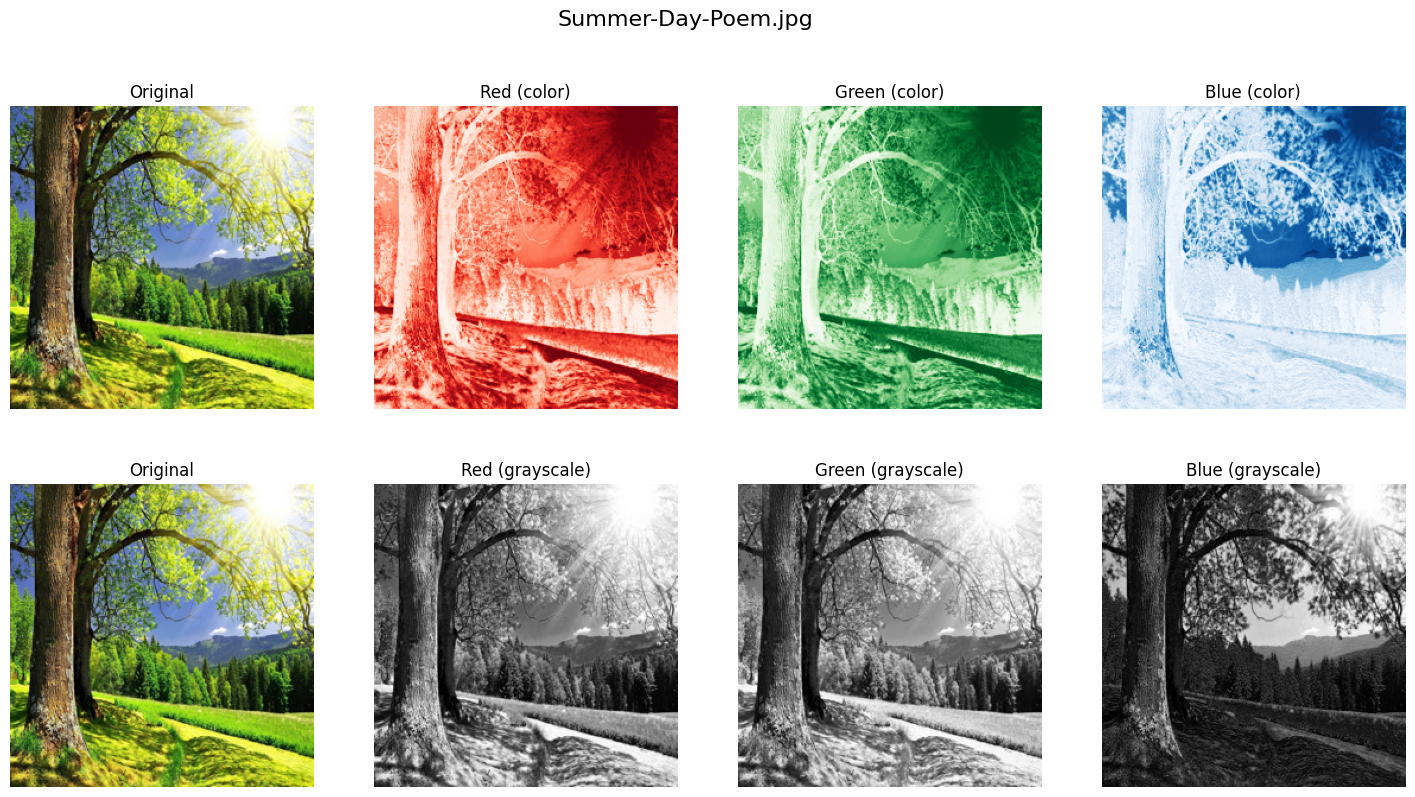

In [19]:
# --- Loop through the first 2 images in your folder ---
for fname in image_files[:2]:
    img = Image.open(fname).convert("RGB").resize((256, 256))
    arr = np.array(img)

    # Split into RGB channels
    red_channel   = arr[:, :, 0]
    green_channel = arr[:, :, 1]
    blue_channel  = arr[:, :, 2]

    # Create figure with 2 rows: color + grayscale
    fig, axs = plt.subplots(2, 4, figsize=(18, 9))
    fig.suptitle(fname, fontsize=16)

    # Row 1: original + colorized channels
    axs[0,0].imshow(arr)
    axs[0,0].set_title("Original")
    axs[0,0].axis("off")

    axs[0,1].imshow(red_channel, cmap="Reds")
    axs[0,1].set_title("Red (color)")
    axs[0,1].axis("off")

    axs[0,2].imshow(green_channel, cmap="Greens")
    axs[0,2].set_title("Green (color)")
    axs[0,2].axis("off")

    axs[0,3].imshow(blue_channel, cmap="Blues")
    axs[0,3].set_title("Blue (color)")
    axs[0,3].axis("off")

    # Row 2: original + grayscale channels
    axs[1,0].imshow(arr)
    axs[1,0].set_title("Original")
    axs[1,0].axis("off")

    axs[1,1].imshow(red_channel, cmap="gray")
    axs[1,1].set_title("Red (grayscale)")
    axs[1,1].axis("off")

    axs[1,2].imshow(green_channel, cmap="gray")
    axs[1,2].set_title("Green (grayscale)")
    axs[1,2].axis("off")

    axs[1,3].imshow(blue_channel, cmap="gray")
    axs[1,3].set_title("Blue (grayscale)")
    axs[1,3].axis("off")

    plt.show()


In [22]:
images_as_arrays

array([[[[  2,  11,  42],
         [  2,  11,  42],
         [  1,  10,  41],
         ...,
         [  1,  11,  44],
         [  9,  14,  48],
         [  6,  11,  43]],

        [[  3,  12,  43],
         [  3,  12,  43],
         [  2,  11,  42],
         ...,
         [  2,  12,  45],
         [  3,  10,  43],
         [  6,  12,  45]],

        [[  3,  12,  43],
         [  3,  12,  43],
         [  4,  13,  44],
         ...,
         [  0,  10,  43],
         [  1,   9,  44],
         [  1,   9,  45]],

        ...,

        [[  0,   0,   0],
         [  1,   1,   1],
         [  0,   0,   0],
         ...,
         [  2,   1,   0],
         [  6,   6,   6],
         [  3,   3,   4]],

        [[  2,   2,   2],
         [  1,   1,   1],
         [  1,   1,   1],
         ...,
         [  2,   2,   2],
         [ 11,  11,  12],
         [  1,   1,   3]],

        [[  2,   2,   2],
         [  2,   2,   2],
         [  1,   1,   1],
         ...,
         [  1,   1,   1],
        

In [23]:
images_as_arrays.shape

(2, 256, 256, 3)